In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

### Question Number 1:

a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

In [223]:
files=os.listdir(r'.\Datasets\Assignment8_data')
base_path=os.getcwd()
df=pd.DataFrame()
for file in files:
    df_part=pd.read_csv(f"{base_path}\\Datasets\\Assignment8_data\\{file}")
    # print(df_part.shape)
    df=pd.concat([df,df_part], ignore_index=True)
print(df.shape)

(576102, 16)


b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)

In [224]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,71766,2018-03-31 16:58:33.1490,2018-04-01 12:54:39.2630,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,341,Customer,1964.0,Female,No
1,62569,2018-03-31 19:03:35.9160,2018-04-01 12:26:25.0350,78.0,Folsom St at 9th St,37.773717,-122.411647,47.0,4th St at Harrison St,37.780955,-122.399749,536,Subscriber,1984.0,Male,No
2,56221,2018-03-31 20:13:13.5640,2018-04-01 11:50:14.8400,258.0,University Ave at Oxford St,37.872355,-122.266447,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,3245,Customer,1983.0,Male,No
3,85844,2018-03-31 11:28:07.6580,2018-04-01 11:18:52.6130,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,340.0,Harmon St at Adeline St,37.849735,-122.270582,3722,Customer,NaN,NaN,No
4,1566,2018-03-31 23:37:56.6400,2018-04-01 00:04:02.8930,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,196.0,Grand Ave at Perkins St,37.808894,-122.256460,2355,Subscriber,1979.0,Male,No


The average duration time is: 834.4304272507298


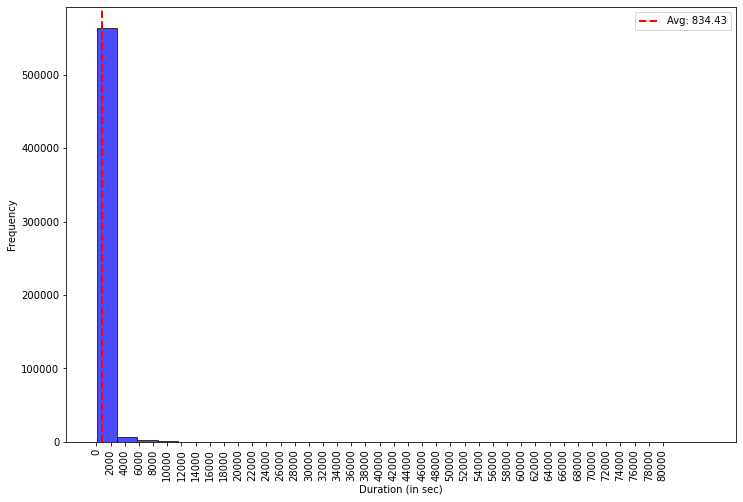

In [225]:
trip_avg=df['duration_sec'].mean()
print(f"The average duration time is: {trip_avg}")

x_ticks=np.arange(0,80001,2000)

plt.figure(figsize=(12,8))
plt.hist(df['duration_sec'], bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(trip_avg, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {trip_avg:.2f}')
plt.xlabel("Duration (in sec)")
plt.ylabel("Frequency")
plt.xticks(x_ticks,rotation=90)
plt.legend()
plt.show()

# Here we can see that athe average time for a trip is 834.43 sec and the most trips are are short trips for around 0 - 3000 sec.

c. Is there any correlation between the months and the trip duration? Use scatter plot
and comment your observations from the plot

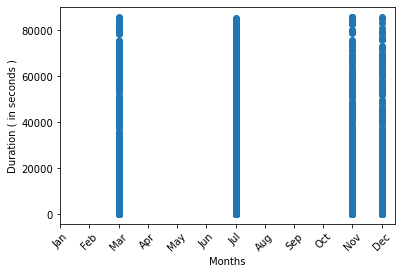

In [226]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df['Month']=pd.to_datetime(df['start_time']).dt.month
plt.scatter(df['Month'],df['duration_sec'])
plt.xlabel('Months')
plt.ylabel('Duration ( in seconds )')
plt.xticks(ticks=range(1,13),labels=months,rotation=45)
plt.show()
# Most of the trips are done during months of March , July, November and December may it be short or long trips

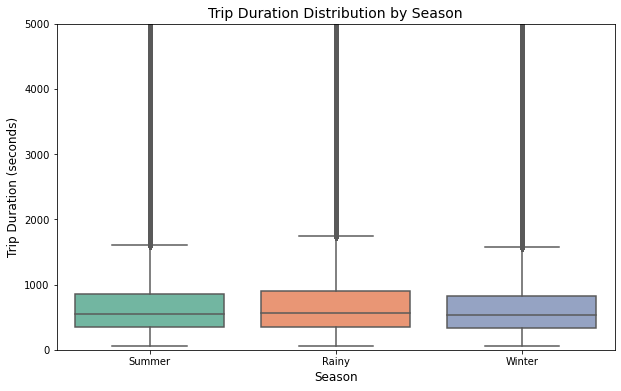

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

def season(month):
    summer = [2, 3, 4, 5]  
    winter = [10, 11, 12, 1] 
    if month in summer:
        return 'Summer'
    elif month in winter:
        return 'Winter'
    else:
        return 'Rainy'

df['Seasons'] = df['Month'].map(season)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Seasons', y='duration_sec', data=df, palette='Set2')
plt.title('Trip Duration Distribution by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Trip Duration (seconds)', fontsize=12)
plt.ylim(0, 5000)
plt.show()



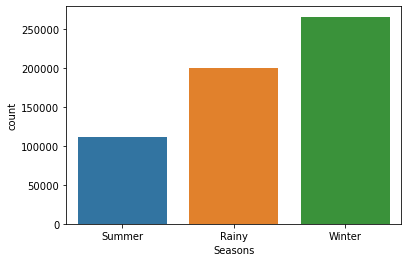

In [228]:
df['Seasons']=df['Month'].map(season)
sns.countplot(df['Seasons'])
plt.show()

#We can see most of the trips are present in the winter season and least trips are done in summer

e. Using multivariate exploration, explain whether there is any relation between short
trips and the users.

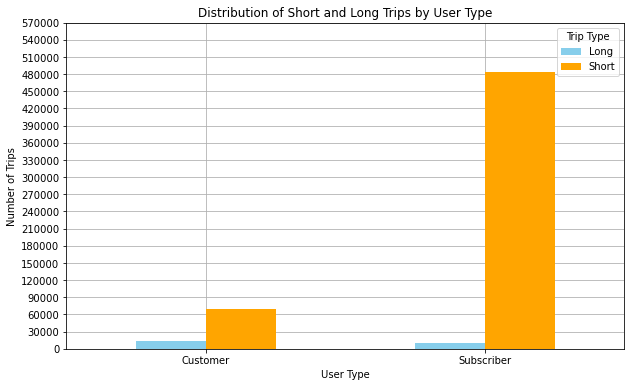

In [229]:
short_trip_threshold = 2000
y_ticks=np.arange(0,600000,30000)
df['Trip_Type'] = df['duration_sec'].apply(lambda x: 'Short' if x < short_trip_threshold else 'Long')

user_trip_distribution = df.groupby(['user_type', 'Trip_Type']).size().unstack()

user_trip_distribution.plot(kind='bar', stacked=False, figsize=(10, 6), color=['skyblue', 'orange'],zorder=3)
plt.title('Distribution of Short and Long Trips by User Type')
plt.xlabel('User Type')
plt.ylabel('Number of Trips')
plt.legend(title='Trip Type')
plt.xticks(rotation=0)
plt.yticks(y_ticks)
plt.grid(which='major')
plt.show()

# From graph we can see that majority of the short trips are done by subscribers rather than customers and long trips are almost same for customers and subscriber

### Question Number 2:

a. Create a Matrix between 0 and 1, with each value difference of 0.01.

In [230]:
array=np.arange(0,1,0.01)
array

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

b. Create an array of 20 linearly spaced points between 0 and 1.

In [231]:
array=np.linspace(0,1,20)
array

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

c. Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard
deviation and sum of all the columns of the matrix.

In [232]:
array_1d=np.arange(1,26)
array_5x5=array_1d.reshape(5,5)
array_sum=np.sum(array_5x5)
array_std=np.std(array_5x5)
column_sum=np.sum(array_5x5,axis=0)

print(f"Id array is :{array_1d}")
print(f"5x5 array is: \n{array_5x5}")
print(f"Sum of array is :{array_sum}")
print(f"Array Stndard deviation is :{array_std}")
print(f"Column wise sum is: {column_sum}")

Id array is :[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]
5x5 array is: 
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
Sum of array is :325
Array Stndard deviation is :7.211102550927978
Column wise sum is: [55 60 65 70 75]


### Question Number 3:

a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide
necessary labels and title to the plot.

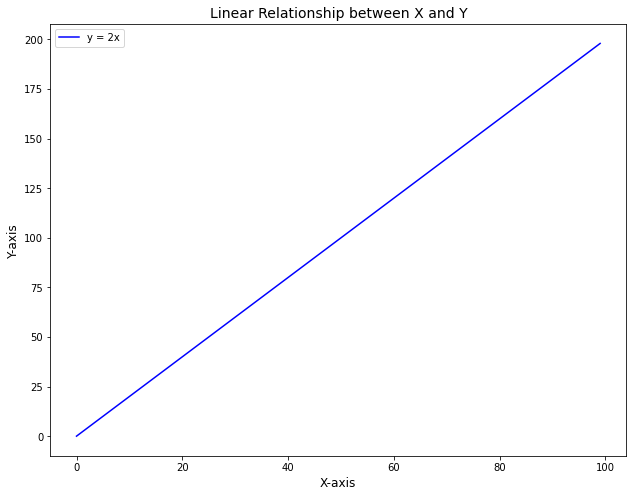

In [233]:
import numpy as np
x = np.arange(0,100)
y = x*2
z = x**2
x = np.arange(0, 100)
y = x * 2

fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])  

ax.plot(x, y, label='y = 2x', color='blue')

ax.set_title('Linear Relationship between X and Y', fontsize=14)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
ax.legend()
plt.show()

b. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]

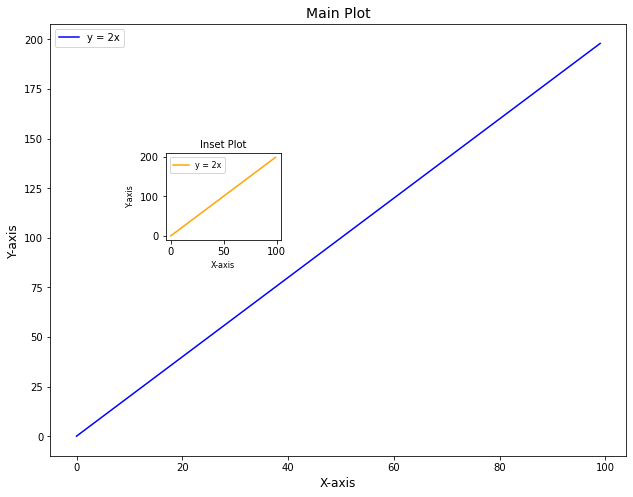

In [234]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_axes([0, 0, 1, 1])  
ax1.plot(x, y, label='y = 2x', color='blue')
ax1.set_title('Main Plot', fontsize=14)
ax1.set_xlabel('X-axis', fontsize=12)
ax1.set_ylabel('Y-axis', fontsize=12)
ax1.legend()


ax2 = fig.add_axes([0.2, 0.5, 0.2, 0.2])
ax2.plot(x, y, label='y = 2x', color='orange')
ax2.set_title('Inset Plot', fontsize=10)
ax2.set_xlabel('X-axis', fontsize=8)
ax2.set_ylabel('Y-axis', fontsize=8)
ax2.legend(fontsize=8)

plt.show()

c. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]

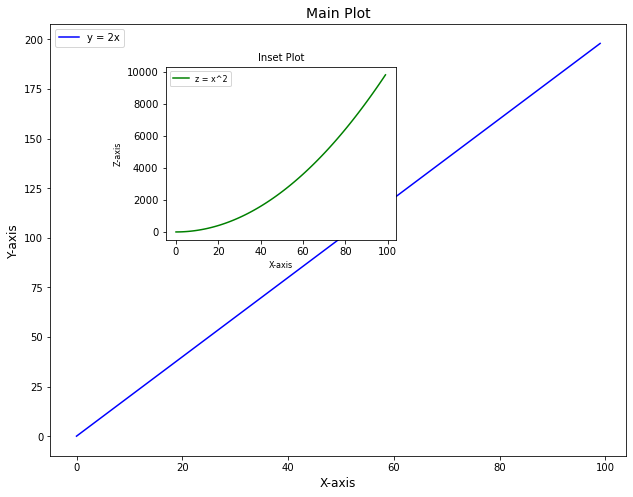

In [235]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 100)
y = x * 2
z = x ** 2

fig = plt.figure(figsize=(8, 6))

ax1 = fig.add_axes([0, 0, 1, 1])  
ax1.plot(x, y, label='y = 2x', color='blue')
ax1.set_title('Main Plot', fontsize=14)
ax1.set_xlabel('X-axis', fontsize=12)
ax1.set_ylabel('Y-axis', fontsize=12)
ax1.legend()


ax2 = fig.add_axes([0.2, 0.5, 0.4, 0.4])
ax2.plot(x, z, label='z = x^2', color='green')
ax2.set_title('Inset Plot', fontsize=10)
ax2.set_xlabel('X-axis', fontsize=8)
ax2.set_ylabel('Z-axis', fontsize=8)
ax2.legend(fontsize=8)

plt.show()

d. Use x, y, z array to create the plots
i. Between x and z arrays
ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in
30-50

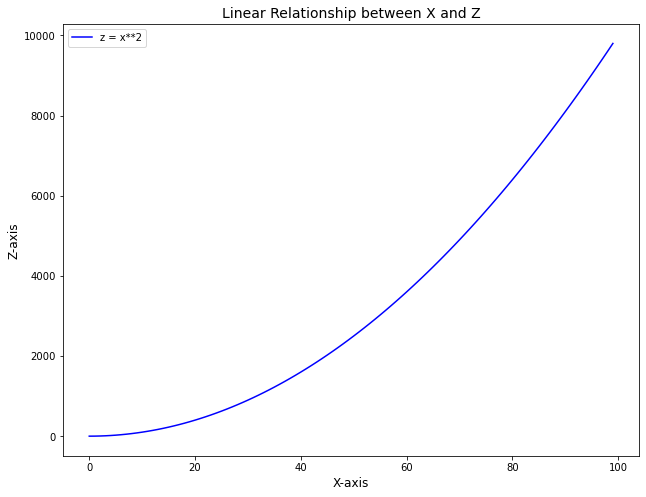

In [236]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])  

ax.plot(x, z, label='z = x**2', color='blue')

ax.set_title('Linear Relationship between X and Z', fontsize=14)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Z-axis', fontsize=12)
ax.legend()
plt.show()

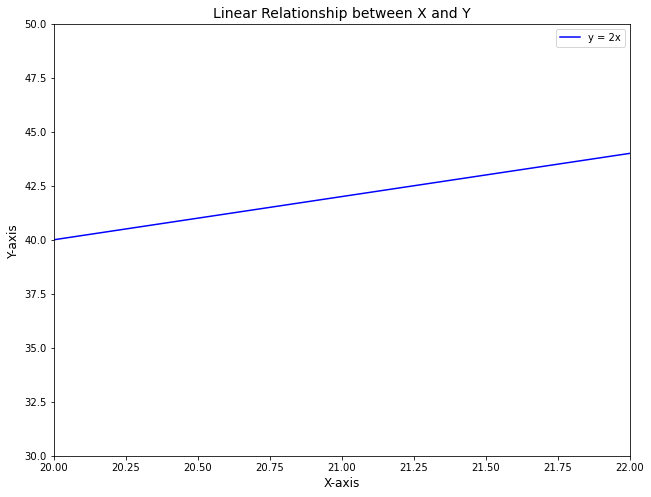

In [237]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])  

ax.plot(x, y, label='y = 2x', color='blue')

ax.set_title('Linear Relationship between X and Y', fontsize=14)
ax.set_xlabel('X-axis', fontsize=12)
ax.set_ylabel('Y-axis', fontsize=12)
plt.xlim(20,22)
plt.ylim(30,50)
ax.legend()
plt.show()

### Question Number 4: The purchase analysis of walmart.

a. What is the average Purchase Price?

In [238]:
df_walmart=pd.read_csv(r'.\Datasets\walmart_purchase_data.csv')
purchase_price_mean=df_walmart['Purchase Price'].mean()
print("average Purchase Price",purchase_price_mean)
df_walmart.head()


average Purchase Price 50.34730200000025


,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


b. What were the highest and lowest purchase prices?

In [239]:
purchase_price_max=df_walmart['Purchase Price'].max()
purchase_price_min=df_walmart['Purchase Price'].min()
print(f'Highest Price : {purchase_price_max} \nLowest Price : {purchase_price_min}')

Highest Price : 99.99 
Lowest Price : 0.0


c. How many people have English 'en' as their Language of choice on the website?

In [240]:
df_walmart[df_walmart['Language']=='en'].count().sum()

15372

d. What is the email of the person with the following Credit Card Number:
4926535242672853

In [241]:
print(df_walmart[df_walmart['Credit Card']==4926535242672853]['Email'])

1234    bondellen@williams-garza.com
Name: Email, dtype: object


e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase
Price for this transaction?

In [242]:
print(df_walmart[df_walmart['Lot']=="90 WT"]['Purchase Price'])

513    75.1
Name: Purchase Price, dtype: float64


f. How many people have American Express as their Credit Card Provider and made
a purchase above $95 ?

In [243]:
print(df_walmart[(df_walmart['CC Provider']=="American Express") & (df_walmart['Purchase Price']>=95.0)]['Purchase Price'].count().sum())

39


g. How many people have a credit card that expires in 2025?

In [244]:
df_walmart[df_walmart['CC Exp Date'].str.contains('/25')].count().sum()

14462

h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com,
etc...) ?

In [245]:
df_walmart['Email_Provider']=df_walmart['Email'].map(lambda email: email.split("@")[-1])

value_count=df_walmart['Email_Provider'].value_counts(ascending=False)
print(value_count[:5])


hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email_Provider, dtype: int64


i. What are the 5 most common Job Titles?

In [246]:
job_value_count=df_walmart['Job'].value_counts(ascending=False)
print(job_value_count[:5])


Interior and spatial designer        31
Lawyer                               30
Social researcher                    28
Purchasing manager                   27
Research officer, political party    27
Name: Job, dtype: int64


j. How many people made the purchase during morning and evening time?

In [247]:
purchase_time_value_count=df_walmart['AM or PM'].value_counts(ascending=False)
purchase_time_value_count

PM    5068
AM    4932
Name: AM or PM, dtype: int64